# Geometry Tests and Plots

In [1]:
%cd H:\GitHub\pytracer\

H:\GitHub\pytracer


In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import numpy as np
from scripts.assemblies import shielded_assembly
import pytracer.geometry as geo
import pytracer.transmission as transmission
import pytracer.fission as fission

plt.rcParams["figure.figsize"] = (12, 9)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


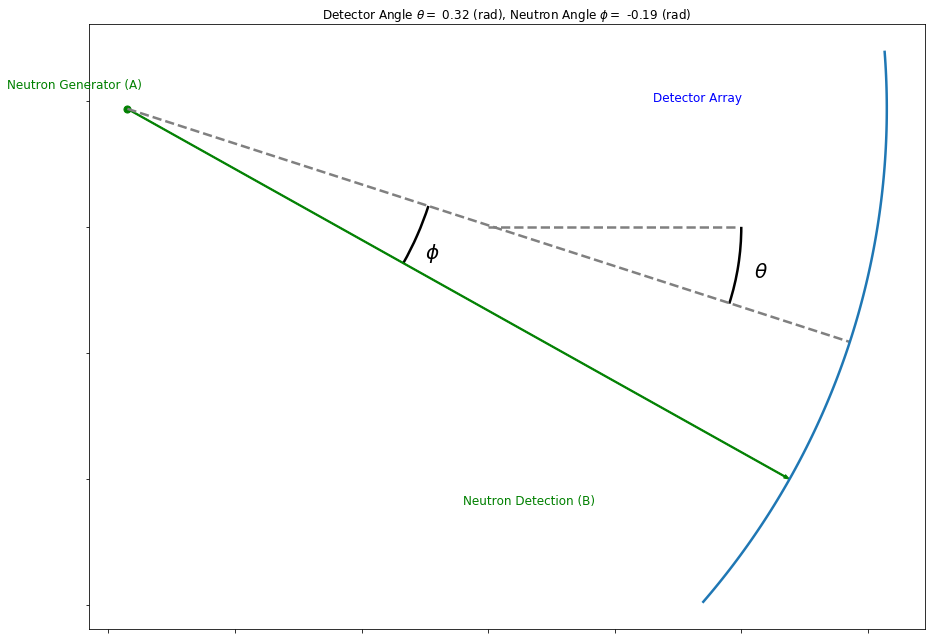

In [14]:
def display_geometry_source():
    assembly_solids = shielded_assembly()
    assembly_flat = geo.flatten(assembly_solids)

    plt.figure()

    # must create neutron beam paths and detector bins
    radians = np.linspace(0, np.pi, 100)
    arc_radians = np.linspace(-np.pi / 8, np.pi / 8, 100)
    source, detector_points, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)
    source = source[0, :, :]

    # display example orientation
    disp_angle = 10
    source_disp_angle = 25
    plt.scatter(source[disp_angle, 0], source[disp_angle, 1], color='green', s=50)
    d, = plt.plot(detector_points[:, disp_angle, 0], detector_points[:, disp_angle, 1], lw=2.5)
    ax = plt.axes()
    l1 = ax.arrow(source[disp_angle, 0], source[disp_angle, 1],
                  detector_points[source_disp_angle, disp_angle, 0] - source[disp_angle, 0],
                  detector_points[source_disp_angle, disp_angle, 1] - source[disp_angle, 1], shape='full',
                  length_includes_head=True, width=0.1, color='green')
    l2, = plt.plot([source[disp_angle, 0], detector_points[int(len(arc_radians) / 2), disp_angle, 0]],
                   [source[disp_angle, 1], detector_points[int(len(arc_radians) / 2), disp_angle, 1]], '--', color='gray',
                   lw=2.5, zorder=5)
    l3, = plt.plot([-source[0, 0] * 0.65, 0],
                   [source[0, 1], 0], '--', color='gray', lw=2.5)
    ax = plt.gca()

    x1, y1 = [[source[disp_angle, 0], detector_points[source_disp_angle, disp_angle, 0]],
              [source[disp_angle, 1], detector_points[source_disp_angle, disp_angle, 1]]]
    x2, y2 = l2.get_data()

    t1 = np.arctan2(y1[1] - y1[0], x1[1] - x1[0]) * 180 / np.pi
    t2 = np.arctan2(y2[1] - y2[0], x2[1] - x2[0]) * 180 / np.pi
    arc = patches.Arc(xy=(x1[0], y1[0]), width=50, height=50, theta1=t1, theta2=t2)
    arc.set_linewidth(2.5)
    ax.add_patch(arc)
    ax.text(-5, -2.5, r'$\phi$', fontsize=20)

    t1 = np.arctan2(y1[1] - 0, x1[1] - 0) * 180 / np.pi
    t2 = np.arctan2(y2[1] - 0, x2[1] - 0) * 180 / np.pi
    arc = patches.Arc(xy=(0, 0), width=40, height=40, theta1=t2, theta2=0)
    arc.set_linewidth(2.5)
    ax.add_patch(arc)
    ax.text(21, -4, r'$\theta$', fontsize=20)

    ax.text(-38, 11, "Neutron Generator (A)", fontsize=12, color='green')
    ax.text(-2, -22, "Neutron Detection (B)", fontsize=12, color='green')
    ax.text(13, 10, "Detector Array", fontsize=12, color='blue')

    plt.title(
        r'Detector Angle $\theta = $ {d:.2f} (rad), Neutron Angle $\phi = $ {n:.2f} (rad)'.format(d=radians[disp_angle],
                                                                                 n=arc_radians[source_disp_angle]))

    d.set_zorder(50)

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.tight_layout()
    plt.show()

display_geometry_source()

## Test if intersection code works correctly

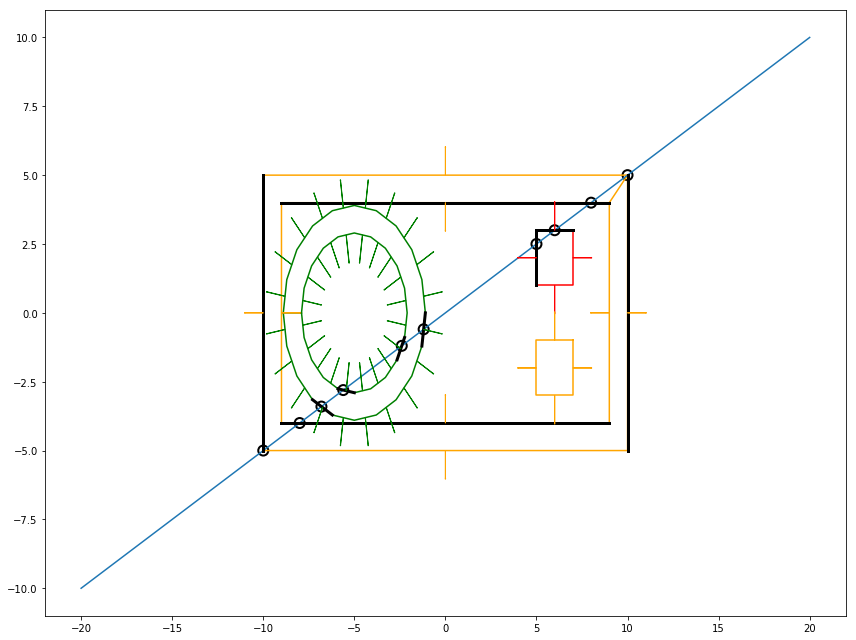

In [3]:
def display_intersection_test():
    assembly_solids = shielded_assembly()
    
    start = np.array([-20., -10.])
    end = np.array([20., 10.])

    plt.figure()
    geo.draw(assembly_solids, show_normals=True, fill=False)
    plt.plot([start[0], end[0]], [start[1], end[1]])

    assembly_flat = geo.flatten(assembly_solids)
    intercepts, indexes = transmission.intersections(start, end, assembly_flat.segments)

    for index in indexes:
        segment = assembly_flat.segments[index]
        plt.plot(segment[:, 0], segment[:, 1], color='black', lw=3)

    for intercept in intercepts:
        plt.scatter(intercept[0], intercept[1], s=100, facecolors='none', edgecolors='black', linewidths=2)

    plt.tight_layout()
    plt.show()

display_intersection_test()

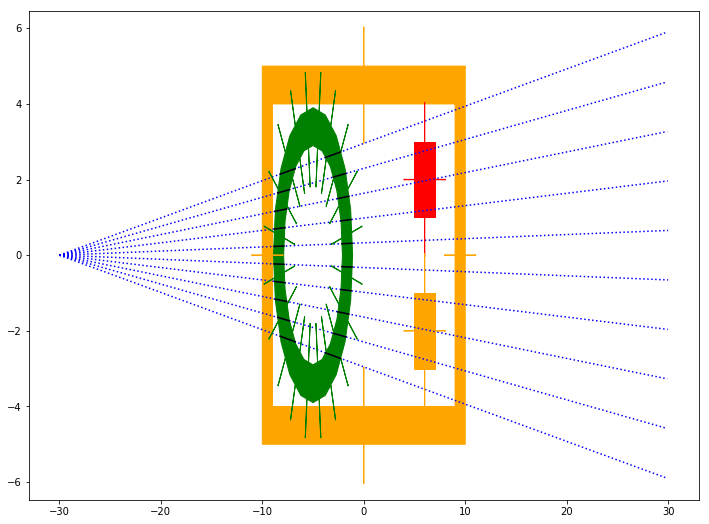

In [11]:
def display_fission_intersection_test():
    assembly_solids = shielded_assembly()
    assembly_flat = geo.flatten(assembly_solids)

    plt.figure()
    geo.draw(assembly_solids, True)

    radians = np.linspace(0, np.pi, 10)
    arc_radians = np.linspace(-np.pi / 8, np.pi / 8, 10) / 4
    start, end, extent = geo.fan_beam_paths(60, arc_radians, radians, extent=True)
    for (s, e) in zip(start[:, 0], end[:, 0]):
        plt.plot([s[0], e[0]], [s[1], e[1]], color='blue', ls='dotted')

    for i, (s, e) in enumerate(zip(start[:, 0], end[:, 0])):
        segments, values = fission.find_fission_segments(s, e, assembly_flat)
        for (segment, value) in zip(segments, values):
            plt.plot(segment[:, 0], segment[:, 1], color='black', zorder=15)

    plt.show()

display_fission_intersection_test()

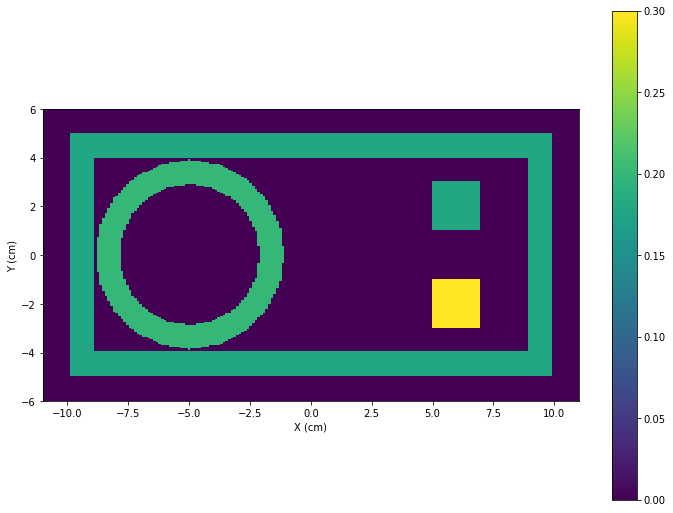

In [7]:
def display_absorbance_sampling_test():
    assembly_solids = shielded_assembly()
    assembly_flat = geo.flatten(assembly_solids)

    xs = np.linspace(-11, 11, 200)
    ys = np.linspace(-6, 6, 200)

    image, extent = transmission.absorbance_image(xs, ys, assembly_flat)

    plt.figure()
    plt.imshow(image.T, interpolation='none', extent=extent)
    plt.colorbar()
    plt.xlabel('X (cm)')
    plt.ylabel('Y (cm)')
    plt.show()
    
display_absorbance_sampling_test()